Github được phát hành dưới dạng thư viện https://github.com/pbcquoc/vietocr `pip install vietocr`

https://pbcquoc.github.io/vietocr/

Quick Start: https://github.com/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb

In [1]:
from PIL import Image
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg


c:\Users\Nguyen Trong Tu\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:

config = Cfg.load_config_from_name('vgg_seq2seq')
config['cnn']['pretrained']=True   # False: model chưa được train
# config['device'] = 'cuda:0' # sử dụng 'cpu' nếu bạn không có GPU
config['device'] = 'cpu' # sử dụng 'cpu' nếu bạn không có GPU
config['predictor']['beamsearch']=True


In [16]:

detector = Predictor(config)


c:\Users\Nguyen Trong Tu\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Nguyen Trong Tu\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model weight C:\Users\NGUYEN~1\AppData\Local\Temp\vgg_seq2seq.pth exsits. Ignore download!


'F'

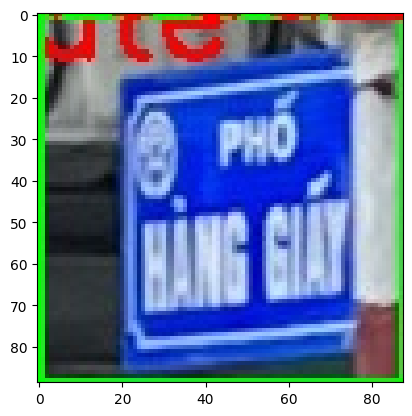

In [19]:
from matplotlib import pyplot as plt

img = r'D:\Hoc IT\Doan Ngoc Cuong\OneDrive - codemely\Proj1_NhanDienBienBaoTenDuong_CODEMELY\mycode\ResearchModel\DATA_TestResearch\crop_sign_test_imgs\cropped_image_0.8504.jpg'
# img = r'DATA_TestResearch\vietocr.png'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

Bug: 
```
File c:\Users\Nguyen Trong Tu\AppData\Local\Programs\Python\Python311\Lib\site-packages\vietocr\tool\translate.py:149, in process_image(image, image_height, image_min_width, image_max_width)
    146 w, h = img.size
    147 new_w, image_height = resize(w, h, image_height, image_min_width, image_max_width)
--> 149 img = img.resize((new_w, image_height), Image.ANTIALIAS)
    151 img = np.asarray(img).transpose(2,0, 1)
    152 img = img/255

AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'
```

Mở file lên sửa: 
```python
# img = img.resize((new_w, image_height), Image.ANTIALIAS)
img = img.resize((new_w, image_height), Image.Resampling.LANCZOS)
```

Chả hiểu sao cả 1 cái biển ra được 1 chữ?